## Import 

In [41]:
!pip install wfdb
!pip install mne

In [42]:
!pip install git+https://github.com/forrestbao/pyeeg.git
!pip install git+https://github.com/talhaanwarch/entropy.git


  Cloning https://github.com/forrestbao/pyeeg.git to c:\users\areeba vohra\appdata\local\temp\pip-req-build-zlfjc8eq


  Running command git clone -q https://github.com/forrestbao/pyeeg.git 'C:\Users\Areeba Vohra\AppData\Local\Temp\pip-req-build-zlfjc8eq'


  Cloning https://github.com/talhaanwarch/entropy.git to c:\users\areeba vohra\appdata\local\temp\pip-req-build-o_0nkic4


  Running command git clone -q https://github.com/talhaanwarch/entropy.git 'C:\Users\Areeba Vohra\AppData\Local\Temp\pip-req-build-o_0nkic4'


  Created wheel for entropy: filename=entropy-0.1.1-py3-none-any.whl size=13614 sha256=28faf15c2de8d64a50b87719c1905d59342dab96d857de91f4342ac3b2d5133d
  Stored in directory: C:\Users\Areeba Vohra\AppData\Local\Temp\pip-ephem-wheel-cache-jrww54g_\wheels\5d\fb\1e\9d95d428d14cd51f0134ceafc9d6bb3e7f6ee9ab9976564e92
Successfully built entropy
  Attempting uninstall: entropy
    Found existing installation: entropy 0.1.1
    Uninstalling entropy-0.1.1:
      Successfully uninstalled entropy-0.1.1


In [1]:
import matplotlib.pyplot as plt
import pathlib
import mne
import numpy as np
import pandas as pd
import matplotlib 
import pathlib
import mne
from glob import glob
from scipy import stats
import pyeeg
import entropy
import pickle
from entropy import *
from sklearn import metrics
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,MaxAbsScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense
from numpy.random import seed
from tensorflow import *


## Analyse and plot sample data

Extracting EDF parameters from C:\Users\Areeba Vohra\Documents\project\sch\s01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 211249  =      0.000 ...   844.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 413 samples (1.652 sec)



C:\Users\AREEBA~1\AppData\Local\Temp/ipykernel_14396/4232799097.py:11: DeprecationWarning: Version 0.23 introduced max_iter="auto", setting max_iter=1000 for `fastica` and max_iter=500 for `infomax` and `picard`. The current default of max_iter=200 will be changed to "auto" in version 0.24.
  ica = mne.preprocessing.ICA(n_components=19, random_state=0)


Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 19 components
Fitting ICA took 5.1s.


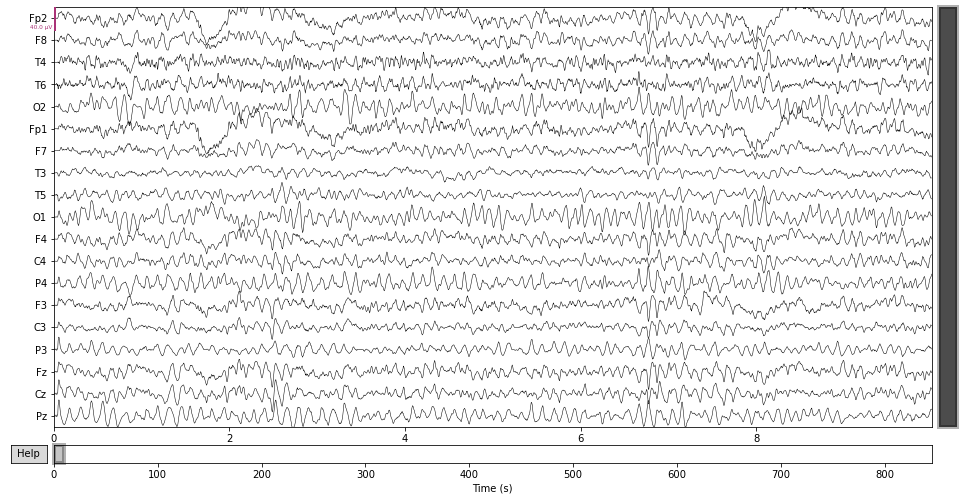

In [2]:
matplotlib.use('Qt5Agg')



raw_path = 'C:\\Users\\Areeba Vohra\\Documents\\project\\sch\\s01.edf'
raw = mne.io.read_raw(raw_path, preload=True)

raw.plot()


ica = mne.preprocessing.ICA(n_components=19, random_state=0)
ica.fit(raw.copy(). filter(8,35))
raw.plot()

In [3]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: Fp2, F8, T4, T6, O2, Fp1, F7, T3, T5, O1, F4, C4, P4, F3, C3, ...
 chs: 19 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2003-06-23 16:14:37 UTC
 nchan: 19
 projs: []
 sfreq: 250.0 Hz
>

In [12]:
raw.ch_names

NameError: name 'raw' is not defined

In [4]:
HC_path = glob('norm/*.edf')
SZ_path=glob('sch/*.edf')

## edf to csv

In [140]:
for i in HC_path:
  
  raw = mne.io.read_raw(i)
  header = ','.join(raw.ch_names)
  np.savetxt(''+i[0:8]+'.csv', raw.get_data().T, delimiter=',', header=header)
  
for j in SZ_path:
  
  raw = mne.io.read_raw(j)
  header = ','.join(raw.ch_names)
  np.savetxt(''+j[0:7]+'.csv', raw.get_data().T, delimiter=',', header=header)
  

AttributeError: module 'mne.io' has no attribute 'read_raw'

In [2]:
from scipy import signal
nyq = 0.5 * 128
l=0.3
low = l / nyq
high = 30 / nyq
b, a = signal.butter(4, [low,high], 'band')
from sklearn.decomposition import PCA
ch=19
pca=PCA(ch)

## Read And Clean Data

In [3]:
HC = []
for i in HC_path:
   data = pd.read_csv(i[0:8] + '.csv')
   data=data.drop_duplicates(subset=None, keep=False, inplace=False)
   data= data[0:210445]
   data=data.reshape(ch,-1,210445).T
   data=np.swapaxes(data,0,1)
   HC.append(data)
print(HC[0].shape)
  

NameError: name 'HC_path' is not defined

In [ ]:
SZ = []
for i in SZ_path:
   data = pd.read_csv(i[0:7] + '.csv')
   data=data.drop_duplicates(subset=None, keep=False, inplace=False)
   data= data[0:210445]
   #print(data.shape)210445
   data=data.values.reshape(-1,19).T
   data=pca.fit_transform(data.T).T
   data=data.reshape(ch,-1,210445).T
   data=np.swapaxes(data,0,1)
   SZ.append(data)
print(SZ[0].shape)
  

In [ ]:
a1=np.array(HC)        
#a2=np.array(SZ)      

#k=np.arra(HC)
j=np.concatenate(((np.zeros(a1.shape[0])),(np.ones(a2.shape[0]))))
k=k.reshape(28,210445,19)
X,y=(HC,SZ),j
y.shape

## Feature Calculation

In [ ]:
from scipy import stats
import pyeeg
from entropy import *
def mean(data):
    return np.mean(data,axis=0)
    
def std(data):
    return np.std(data,axis=0)

def ptp(data):
    return np.ptp(data,axis=0)

def var(data):
        return np.var(data,axis=0)

def minim(data):
      return np.min(data,axis=0)


def maxim(data):
      return np.max(data,axis=0)


def mean_square(data):
      return np.mean(data**2,axis=0)

def rms(data): #root mean square
      return  np.sqrt(np.mean(data**2,axis=0))  

def abs_diffs_signal(data):
    return np.sum(np.abs(np.diff(data,axis=0)),axis=0)


def skewness(data):
    return stats.skew(data,axis=0)

def kurtosis(data):
    return stats.kurtosis(data,axis=0)

def zero_crossing(data):
    return np.argmax(np.diff(np.sign(data),axis=0),axis=0)

def app_epy(data):
    result=[]
    for i in data.T:
        result.append(app_entropy(i, order=2, metric='chebyshev'))
    return np.array(result)

def perm_epy(data):
    result=[]
    for i in data.T:
        result.append(perm_entropy(i, order=3, normalize=True))
    return np.array(result)

def svd_epy(data):
    result=[]
    for i in data.T:
        result.append(svd_entropy(i, order=3, delay=1, normalize=True))
    return np.array(result)

def spectral_epy(data):
    result=[]
    for i in data.T:
        result.append(spectral_entropy(i, 100, method='welch', normalize=True))
    return np.array(result)

def sample_epy(data):
    result=[]
    for i in data.T:
        result.append(sample_entropy(i, order=2, metric='chebyshev'))
    return np.array(result)


def katz(data):
    result=[]
    for i in data.T:
        result.append(katz_fd(i))
    return np.array(result)

def higuchi(data):
    result=[]
    for i in data.T:
        result.append(higuchi_fd(i))
    return np.array(result)


def petrosian(data):
    result=[]
    for i in data.T:
        result.append(petrosian_fd(i))
    return np.array(result)

def autogressiveModelParameters(data):
    feature = []
    for i in data.T:
        coeff, sig = alg.AR_est_YW(i, order=5)
        feature.append(np.mean(coeff))
    return np.array(feature)

def teager(x):
    for i in range(len(x)-1):
        return x[i]**2 - (x[i-1]*x[i+1])


        
def hjorth_mobility(data):
    return np.divide(np.std(np.diff(data,axis=0),axis=0),np.std(data,axis=0))

def hjorth_complexity(data):
    return np.divide(hjorth_mobility(np.diff(data,axis=0)),  hjorth_mobility(data))      




def concatenate_features(data):
    return np.concatenate((mean(data),std(data),ptp(data),var(data),minim(data),maxim(data),
                          mean_square(data),rms(data),abs_diffs_signal(data),
                          skewness(data),kurtosis(data),zero_crossing(data),
                          app_epy(data),perm_epy(data),svd_epy(data),spectral_epy(data),sample_epy(data),
                          katz(data),higuchi(data),petrosian(data),
                          hjorth_mobility(data),hjorth_complexity(data)),axis=0)

In [13]:
features1=[]
j=1;
for f in HC:

    feature=[]
    for i in f:
        feature.append(concatenate_features(i))
    features1.append(np.mean(np.array(feature),axis=0))
print("Completed file" , j)
j=j+1

Completed file 1


In [25]:
features2=[]
j=1;
for f in SZ:
    feature=[]
    for i in f:
        feature.append(concatenate_features(i))
    features2.append(np.mean(np.array(feature),axis=0))
    print("Completed file" , j)
    j=j+1

Completed file 1
Completed file 2
Completed file 3
Completed file 4
Completed file 5
Completed file 6
Completed file 7
Completed file 8
Completed file 9
Completed file 10
Completed file 11
Completed file 12
Completed file 13
Completed file 14


In [23]:
features1


[array([-4.12671216e-22, -2.66613426e-22, -1.78257479e-22,  2.62491866e-22,
         6.49145733e-23, -1.83924624e-22,  1.59452861e-22, -9.78870549e-24,
        -5.69290504e-23,  5.61562578e-23,  2.15351521e-22,  5.15195026e-25,
         1.34401502e-22,  1.19782844e-22,  3.24572866e-23,  3.20708904e-23,
        -4.93299237e-23,  4.98451188e-23,  5.17127007e-23,  3.27547452e-05,
         1.90125963e-05,  1.24858183e-05,  1.12263691e-05,  7.65272014e-06,
         5.82981736e-06,  5.42591201e-06,  4.39112090e-06,  4.16829306e-06,
         3.94360453e-06,  3.33866267e-06,  2.91679857e-06,  2.48865558e-06,
         2.35788034e-06,  2.07620018e-06,  1.86987582e-06,  1.84904462e-06,
         1.66411973e-06,  1.45775742e-06,  3.20725437e-04,  4.13876694e-04,
         1.37111341e-04,  2.61395795e-04,  8.49826973e-05,  7.29141374e-05,
         9.99957562e-05,  1.18353195e-04,  1.00552666e-04,  5.01169588e-05,
         5.51721698e-05,  5.64301048e-05,  3.95589860e-05,  3.79472818e-05,
         3.7

In [18]:
with open('features1.data', 'wb') as f:
    pickle.dump(features1, f)
    

(418,)

In [26]:
with open('features2.data', 'wb') as f:
    pickle.dump(features2, f)
    

(418,)

In [14]:
with open('features1.data', 'rb') as f:
   features_HC = pickle.load(f)   

with open('features2.data', 'rb') as f:
   features_SZ = pickle.load(f)   
print(features_HC[0].shape, features_SZ[0].shape)

EOFError: Ran out of input

In [6]:
x1=np.array(features_HC)        
x2=np.array(features_SZ)      

X_all=np.concatenate((x1,x2),axis=0)
y_all=np.concatenate(((np.zeros(x1.shape[0])),(np.ones(x2.shape[0]))))

print(x1.shape,x2.shape)
y_all.shape


(14, 418) (14, 418)


(28,)

## Split into train/test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all,test_size=0.3, random_state=42,stratify=y_all)



## Classification (DTree)

In [91]:
clf = DecisionTreeClassifier(criterion="entropy",random_state=42)
#clf = RandomForestClassifier(n_estimators=100, random_state=43)
clf=clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
#print("Accuracy=",metrics.accuracy_score(y_test,y_pred))
print("Testing acc=",clf.score(X_test,y_test)*100)

print("Training acc=",clf.score(X_train,y_train)*100)

Testing acc= 77.77777777777779
Training acc= 100.0


C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1487: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 15 instead of 50).
  warnings.warn("Removed duplicate entries from 'train_sizes'. Number "


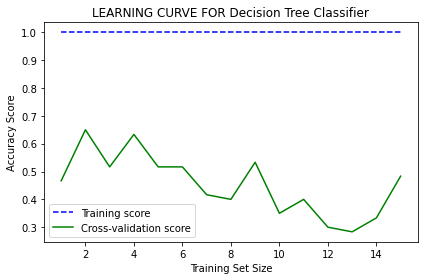

In [40]:
sizes, training_scores, testing_scores = learning_curve(DecisionTreeClassifier(), X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
  
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("LEARNING CURVE FOR Decision Tree Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Accuracy Score (Decision Tree) : 77')

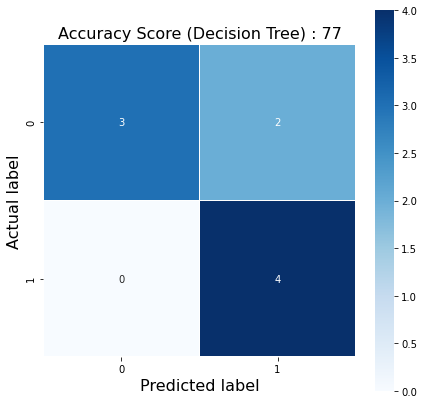

In [50]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label', size =16)
plt.xlabel('Predicted label', size =16)
acc = (clf.score(X_test, y_test)*100)
acc1 = int(acc)
all_sample_title = 'Accuracy Score (Decision Tree) : {0}'.format(acc1)
plt.title(all_sample_title, size = 16)

In [93]:
# Creating the hyperparameter grid 
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
  
# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()
  
# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)
  
tree_cv.fit(X_train, y_train)
  
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 3}
Best score is 0.75


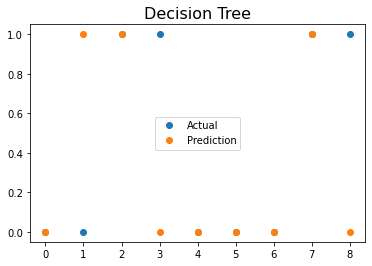

In [173]:
plt.plot(y_test, 'o', label = 'Actual')
plt.plot(y_pred, 'o',  label = 'Prediction')
plt.title("Decision Tree", size =16)
plt.legend()

In [174]:
clf = RandomForestClassifier(n_estimators=100, random_state=43)
clf=clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
#print("Accuracy=",metrics.accuracy_score(y_test,y_pred))
print("Testing acc=",clf.score(X_test,y_test)*100)

print("Training acc=",clf.score(X_train,y_train)*100)

Testing acc= 77.77777777777779
Training acc= 100.0


In [96]:
# Creating the hyperparameter grid 
param_dist = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
  
# Instantiating Decision Tree classifier
tune = RandomForestClassifier()
  
# Instantiating RandomizedSearchCV object
tune_cv = RandomizedSearchCV(tune, param_dist, cv = 5)
  
tune_cv.fit(X_train, y_train)
  
# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(tune_cv.best_params_))
print("Best score is {}".format(tune_cv.best_score_))

Tuned Random Forest Parameters: {'n_estimators': 1200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}
Best score is 0.4666666666666667


C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1487: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 15 instead of 50).
  warnings.warn("Removed duplicate entries from 'train_sizes'. Number "


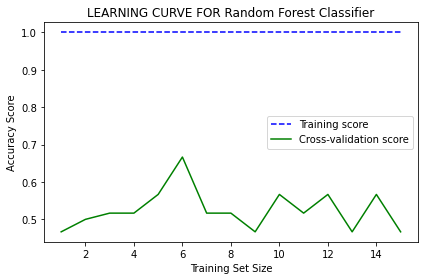

In [32]:
sizes, training_scores, testing_scores = learning_curve(RandomForestClassifier(), X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
  
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("LEARNING CURVE FOR Random Forest Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Accuracy Score (Random Forest) : 77')

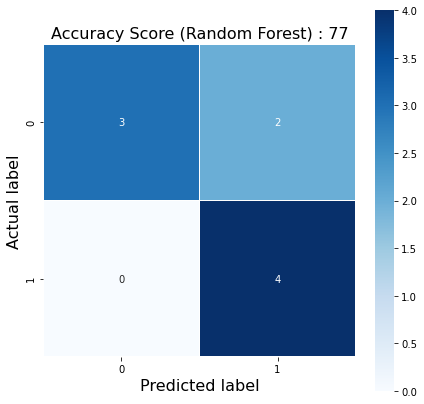

In [52]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label', size =16)
plt.xlabel('Predicted label', size=16)
acc = (clf.score(X_test, y_test)*100)
acc1 = int(acc)
all_sample_title = 'Accuracy Score (Random Forest) : {0}'.format(acc1)
plt.title(all_sample_title, size = 16)

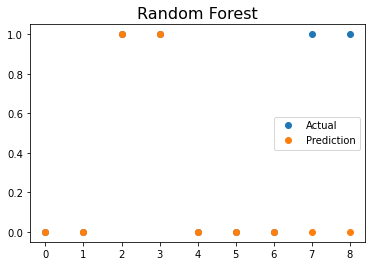

In [175]:
plt.plot(y_test, 'o', label = 'Actual')
plt.plot(y_pred, 'o',  label = 'Prediction')
plt.title("Random Forest", size =16)
plt.legend()

## SVC

In [176]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
clf=SVC(kernel='rbf')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))
print('accuracy is ',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

accuracy is  1.0


In [163]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
  
# Creating the hyperparameter grid 
param_dist = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
  
# Instantiating Decision Tree classifier
tune = SVC()
  
# Instantiating RandomizedSearchCV object
tune_cv = RandomizedSearchCV(tune, param_dist, cv = 5)
  
tune_cv.fit(X_train, y_train)
  
# Print the tuned parameters and score
print("Tuned SVC Parameters: {}".format(tune_cv.best_params_))
print("Best score is {}".format(tune_cv.best_score_))

Tuned SVC Parameters: {'kernel': 'rbf', 'gamma': 0.0001, 'C': 10}
Best score is 0.6166666666666667


C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1487: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 15 instead of 50).
  warnings.warn("Removed duplicate entries from 'train_sizes'. Number "
C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 558, in _validate_targets
    raise Va

C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 558, in _validate_targets
    raise ValueError(
ValueError: The number of classes has to be greater than one; got 1 class

  warnings.warn("Estimator fit failed. The score on this train-test"


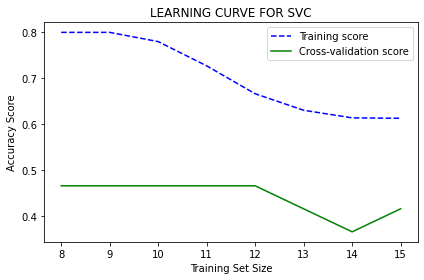

In [43]:
sizes, training_scores, testing_scores = learning_curve(SVC(), X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
  
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("LEARNING CURVE FOR SVC")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Accuracy Score (SVC) : 100     ')

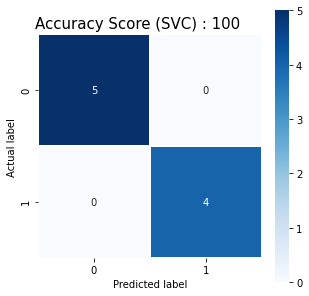

In [35]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
acc = (clf.score(X_test, y_test)*100)
acc1 = int(acc)
all_sample_title = 'Accuracy Score (SVC) : {0}     '.format(acc1)
plt.title(all_sample_title, size = 15)

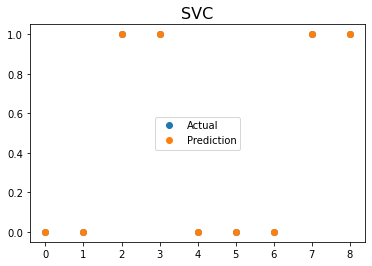

In [183]:
plt.plot(y_test, 'o', label = 'Actual')
plt.plot(y_pred, 'o',  label = 'Prediction')
plt.title("SVC", size =16)
plt.legend(loc="center")

## Logistic Regression

In [184]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [209]:
clf=LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))
print('accuracy is ',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.80      0.73         5
         1.0       0.67      0.50      0.57         4

    accuracy                           0.67         9
   macro avg       0.67      0.65      0.65         9
weighted avg       0.67      0.67      0.66         9

accuracy is  0.6666666666666666


In [172]:
# Creating the hyperparameter grid 
c_space = np.logspace(-5, 8, 15)
param_dist = {'C': c_space}
  
# Instantiating Decision Tree classifier
tune = LogisticRegression()
  
# Instantiating RandomizedSearchCV object
tune_cv = RandomizedSearchCV(tune, param_dist, cv = 5)
  
tune_cv.fit(X_train, y_train)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(tune_cv.best_params_))
print("Best score is {}".format(tune_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.05179474679231213}
Best score is 0.5833333333333333


C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1487: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 15 instead of 50).
  warnings.warn("Removed duplicate entries from 'train_sizes'. Number "
C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    raise ValueError("This solver needs samples of at least 2 classes"
ValueError: This solver needs samples of at least 2 classes in the data, 

C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Areeba Vohra\anaconda3\lib

C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

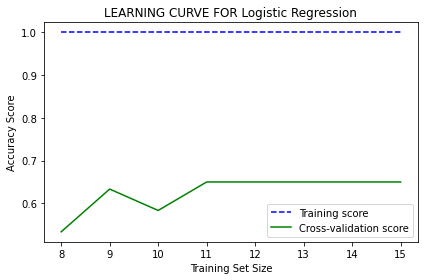

In [44]:
sizes, training_scores, testing_scores = learning_curve(LogisticRegression(), X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
  
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("LEARNING CURVE FOR Logistic Regression")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Accuracy Score (Logistic Regression) : 66')

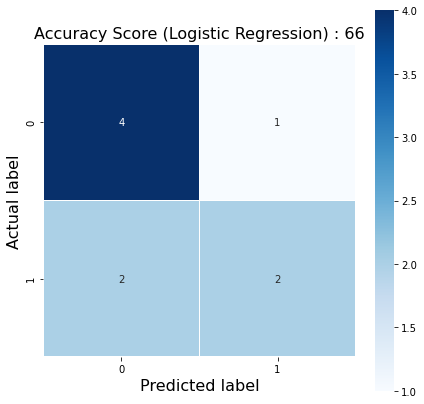

In [215]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label',size =16)
plt.xlabel('Predicted label', size = 16)
acc = (clf.score(X_test, y_test)*100)
acc1 = int(acc)
all_sample_title = 'Accuracy Score (Logistic Regression) : {0}'.format(acc1)
plt.title(all_sample_title, size = 16)

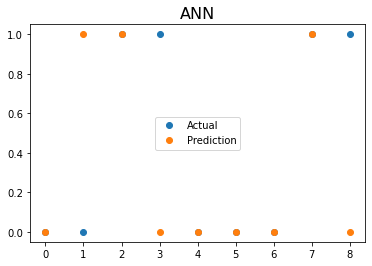

In [216]:
plt.plot(y_test, 'o', label = 'Actual')
plt.plot(y_pred, 'o',  label = 'Prediction')
plt.title("ANN", size =16)
plt.legend()

## KNN

In [218]:
clf = KNeighborsClassifier(n_neighbors=1)
clf=clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
#print("Accuracy=",metrics.accuracy_score(y_test,y_pred))
print("Testing acc=",clf.score(X_test,y_test)*100)

print("Training acc=",clf.score(X_train,y_train)*100)

Testing acc= 66.66666666666666
Training acc= 100.0


In [88]:
# Creating the hyperparameter grid 
param_dist = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
  
# Instantiating Decision Tree classifier
tune =  KNeighborsClassifier()
  
# Instantiating RandomizedSearchCV object
tune_cv = RandomizedSearchCV(tune, param_dist, cv = 5)
  
tune_cv.fit(X_train, y_train)
  
# Print the tuned parameters and score
print("Tuned KNN Parameters: {}".format(tune_cv.best_params_))
print("Best score is {}".format(tune_cv.best_score_))

Tuned KNN Parameters: {'weights': 'distance', 'n_neighbors': 9, 'metric': 'minkowski'}
Best score is 0.6166666666666667


C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1487: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 15 instead of 50).
  warnings.warn("Removed duplicate entries from 'train_sizes'. Number "
C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236

C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\Areeba Vohra\anaconda3\lib\site-packages\sklearn\neighbors\_

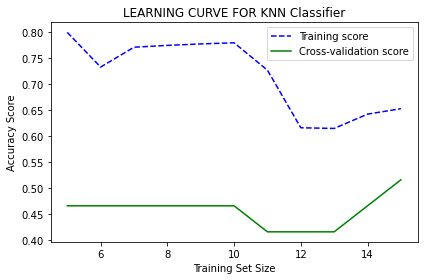

In [45]:
sizes, training_scores, testing_scores = learning_curve(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
  
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("LEARNING CURVE FOR KNN Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [1]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
acc = (clf.score(X_test, y_test)*100)
acc1 = int(acc)
all_sample_title = 'Accuracy Score (KNN) : {0}     '.format(acc1)
plt.title(all_sample_title, size = 15)

NameError: name 'confusion_matrix' is not defined

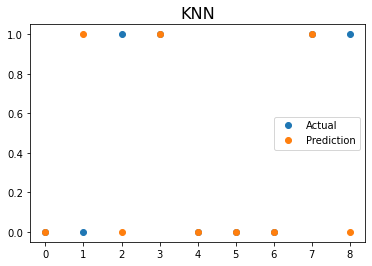

In [220]:
plt.plot(y_test, 'o', label = 'Actual')
plt.plot(y_pred, 'o',  label = 'Prediction')
plt.title("KNN", size =16)
plt.legend()

In [22]:
model = Sequential()
model.add(Dense(12, input_shape=(418,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train,y_train,validation_split = 0.3, epochs=40, batch_size=30)
# acc = model.evaluate(X_test, y_test)
# training_accuracy = model.evaluate(X_train, y_train)[1]
# print("Training acc=",training_accuracy*100)
# accan
_, overall_acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on total data set: %.3f' % (overall_acc))

Epoch 1/40
1/1 [==============================] - 0s 236ms/step - loss: 156.8447 - accuracy: 0.6923 - val_loss: 3.6741 - val_accuracy: 0.1667
Epoch 2/40
1/1 [==============================] - 0s 32ms/step - loss: 149.7490 - accuracy: 0.6923 - val_loss: 3.3823 - val_accuracy: 0.1667
Epoch 3/40
1/1 [==============================] - 0s 32ms/step - loss: 142.7644 - accuracy: 0.6154 - val_loss: 3.0751 - val_accuracy: 0.3333
Epoch 4/40
1/1 [==============================] - 0s 32ms/step - loss: 135.9019 - accuracy: 0.6154 - val_loss: 2.7980 - val_accuracy: 0.3333
Epoch 5/40
1/1 [==============================] - 0s 24ms/step - loss: 129.1811 - accuracy: 0.6154 - val_loss: 2.5364 - val_accuracy: 0.3333
Epoch 6/40
1/1 [==============================] - 0s 32ms/step - loss: 122.5713 - accuracy: 0.6923 - val_loss: 2.3978 - val_accuracy: 0.3333
Epoch 7/40
1/1 [==============================] - 0s 24ms/step - loss: 116.3672 - accuracy: 0.6923 - val_loss: 2.4092 - val_accuracy: 0.3333
Epoch 8/40
1

In [23]:
X = np.array(X_all)
y = np.array(y_all)
#X_t = np.array(X_test)
#y_t = np.array(y_test)
y.shape

(28,)

In [28]:
X= X.reshape(28,418,1)
#X_t= X_t.reshape(9,418,1)
#y_t=y_t.reshape(9,1)
y = y.reshape(28,1)
X.shape

(28, 418, 1)

In [25]:
import tensorflow as tf
from tensorflow import keras
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from keras.optimizers import *

In [129]:
model2 = Sequential()
model2.add(LSTM(64, return_sequences=True,
               input_shape=(418, 1)))  # returns a sequence of vectors of dimension 32
model2.add(Dropout(0.5))
model2.add(LSTM(32, return_sequences=True))  # return a single vector of dimension 32
model2.add(LSTM(32))

model2.add(Dense(1, activation='sigmoid'))

mc_test = ModelCheckpoint('best_test_model.h5', monitor='accuracy', mode='max', verbose = 1, save_best_only=True)
mc_val = ModelCheckpoint('best_val_model.h5', monitor='val_accuracy', mode='max', verbose = 1, save_best_only=True)  #Save best model accuracy
opt = Adam(lr=0.01, decay=0.001);
model2.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


In [130]:
model2.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_73 (LSTM)               (None, 418, 64)           16896     
_________________________________________________________________
dropout_35 (Dropout)         (None, 418, 64)           0         
_________________________________________________________________
lstm_74 (LSTM)               (None, 418, 32)           12416     
_________________________________________________________________
lstm_75 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 33        
Total params: 37,665
Trainable params: 37,665
Non-trainable params: 0
_________________________________________________________________


In [136]:
history2 = model2.fit(X, y, validation_split = 0.1, epochs = 5, batch_size = 5, callbacks=[mc_test, mc_val])  # Train for 40 epochs on 70% of the data

Epoch 1/5
5/5 [==============================] - ETA: 0s - loss: 1.9794 - accuracy: 0.5600
Epoch 00001: accuracy did not improve from 1.00000

Epoch 00001: val_accuracy did not improve from 0.46154
5/5 [==============================] - 2s 326ms/step - loss: 1.9794 - accuracy: 0.5600 - val_loss: 3.5061 - val_accuracy: 0.0000e+00
Epoch 2/5
5/5 [==============================] - ETA: 0s - loss: 1.2373 - accuracy: 0.5600
Epoch 00002: accuracy did not improve from 1.00000

Epoch 00002: val_accuracy did not improve from 0.46154
5/5 [==============================] - 2s 309ms/step - loss: 1.2373 - accuracy: 0.5600 - val_loss: 1.8949 - val_accuracy: 0.0000e+00
Epoch 3/5
5/5 [==============================] - ETA: 0s - loss: 0.8151 - accuracy: 0.5600
Epoch 00003: accuracy did not improve from 1.00000

Epoch 00003: val_accuracy did not improve from 0.46154
5/5 [==============================] - 2s 305ms/step - loss: 0.8151 - accuracy: 0.5600 - val_loss: 1.1675 - val_accuracy: 0.0000e+00
Epoch 4

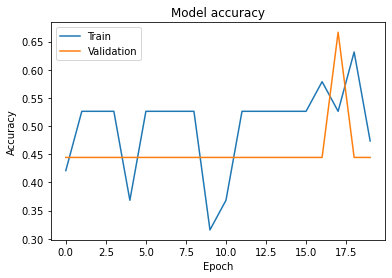

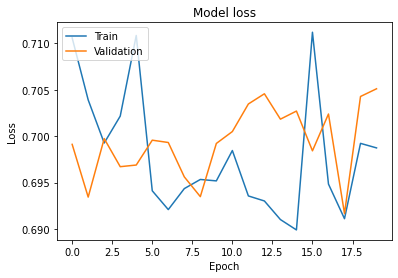

In [114]:
#Plot values
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [37]:
model = Sequential()
model.add(Dense(12, input_shape=(418,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train,y_train,validation_split = 0.3, epochs=400, batch_size=30)
# acc = model.evaluate(X_test, y_test)
# training_accuracy = model.evaluate(X_train, y_train)[1]
# print("Training acc=",training_accuracy*100)
# acc
_, overall_acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on total data set: %.3f' % (overall_acc))

Epoch 1/400
1/1 [==============================] - 0s 283ms/step - loss: 73.2529 - accuracy: 0.4615 - val_loss: 0.8611 - val_accuracy: 0.8333
Epoch 2/400
1/1 [==============================] - 0s 32ms/step - loss: 68.9047 - accuracy: 0.4615 - val_loss: 0.9926 - val_accuracy: 0.8333
Epoch 3/400
1/1 [==============================] - 0s 40ms/step - loss: 64.5862 - accuracy: 0.4615 - val_loss: 1.2879 - val_accuracy: 0.5000
Epoch 4/400
1/1 [==============================] - 0s 56ms/step - loss: 60.0455 - accuracy: 0.5385 - val_loss: 1.7236 - val_accuracy: 0.5000
Epoch 5/400
1/1 [==============================] - 0s 40ms/step - loss: 55.5279 - accuracy: 0.6154 - val_loss: 2.2021 - val_accuracy: 0.3333
Epoch 6/400
1/1 [==============================] - 0s 37ms/step - loss: 50.9707 - accuracy: 0.6923 - val_loss: 2.6995 - val_accuracy: 0.3333
Epoch 7/400
1/1 [==============================] - 0s 32ms/step - loss: 46.2399 - accuracy: 0.7692 - val_loss: 3.1204 - val_accuracy: 0.3333
Epoch 8/400


1/1 [==============================] - 0s 32ms/step - loss: 0.0367 - accuracy: 1.0000 - val_loss: 6.7843 - val_accuracy: 0.1667
Epoch 60/400
1/1 [==============================] - 0s 32ms/step - loss: 0.0351 - accuracy: 1.0000 - val_loss: 6.8199 - val_accuracy: 0.1667
Epoch 61/400
1/1 [==============================] - 0s 24ms/step - loss: 0.0335 - accuracy: 1.0000 - val_loss: 6.8573 - val_accuracy: 0.1667
Epoch 62/400
1/1 [==============================] - 0s 24ms/step - loss: 0.0320 - accuracy: 1.0000 - val_loss: 6.8960 - val_accuracy: 0.1667
Epoch 63/400
1/1 [==============================] - 0s 24ms/step - loss: 0.0306 - accuracy: 1.0000 - val_loss: 6.9414 - val_accuracy: 0.1667
Epoch 64/400
1/1 [==============================] - 0s 32ms/step - loss: 0.0293 - accuracy: 1.0000 - val_loss: 6.9922 - val_accuracy: 0.1667
Epoch 65/400
1/1 [==============================] - 0s 24ms/step - loss: 0.0280 - accuracy: 1.0000 - val_loss: 7.0434 - val_accuracy: 0.1667
Epoch 66/400
1/1 [========

Epoch 117/400
1/1 [==============================] - 0s 32ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 8.8020 - val_accuracy: 0.1667
Epoch 118/400
1/1 [==============================] - 0s 32ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 8.8066 - val_accuracy: 0.1667
Epoch 119/400
1/1 [==============================] - 0s 40ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 8.8106 - val_accuracy: 0.1667
Epoch 120/400
1/1 [==============================] - 0s 40ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 8.8138 - val_accuracy: 0.1667
Epoch 121/400
1/1 [==============================] - 0s 29ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 8.8165 - val_accuracy: 0.1667
Epoch 122/400
1/1 [==============================] - 0s 24ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 8.8194 - val_accuracy: 0.1667
Epoch 123/400
1/1 [==============================] - 0s 24ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 8.8224 - val_accuracy: 0.1667
Epoch 

Epoch 174/400
1/1 [==============================] - 0s 32ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 9.0455 - val_accuracy: 0.1667
Epoch 175/400
1/1 [==============================] - 0s 32ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 9.0504 - val_accuracy: 0.1667
Epoch 176/400
1/1 [==============================] - 0s 24ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 9.0554 - val_accuracy: 0.1667
Epoch 177/400
1/1 [==============================] - 0s 24ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 9.0604 - val_accuracy: 0.1667
Epoch 178/400
1/1 [==============================] - 0s 32ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 9.0655 - val_accuracy: 0.1667
Epoch 179/400
1/1 [==============================] - 0s 32ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 9.0706 - val_accuracy: 0.1667
Epoch 180/400
1/1 [==============================] - 0s 32ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 9.0757 - val_accuracy: 0.1667
Epoch 

Epoch 231/400
1/1 [==============================] - 0s 32ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 9.3081 - val_accuracy: 0.1667
Epoch 232/400
1/1 [==============================] - 0s 24ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 9.3124 - val_accuracy: 0.1667
Epoch 233/400
1/1 [==============================] - 0s 40ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 9.3167 - val_accuracy: 0.1667
Epoch 234/400
1/1 [==============================] - 0s 32ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 9.3207 - val_accuracy: 0.1667
Epoch 235/400
1/1 [==============================] - 0s 32ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 9.3248 - val_accuracy: 0.1667
Epoch 236/400
1/1 [==============================] - 0s 29ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 9.3290 - val_accuracy: 0.1667
Epoch 237/400
1/1 [==============================] - 0s 32ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 9.3332 - val_accuracy: 0.1667
Epoch 

1/1 [==============================] - 0s 24ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 9.6669 - val_accuracy: 0.1667
Epoch 346/400
1/1 [==============================] - 0s 34ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 9.6693 - val_accuracy: 0.1667
Epoch 347/400
1/1 [==============================] - 0s 32ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 9.6719 - val_accuracy: 0.1667
Epoch 348/400
1/1 [==============================] - 0s 44ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 9.6747 - val_accuracy: 0.1667
Epoch 349/400
1/1 [==============================] - 0s 38ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 9.6769 - val_accuracy: 0.1667
Epoch 350/400
1/1 [==============================] - 0s 32ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 9.6793 - val_accuracy: 0.1667
Epoch 351/400
1/1 [==============================] - 0s 32ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 9.6818 - val_accuracy: 0.1667
Epoch 352/400
1/1 [=